#Final Report: Data analysis
INTRODUCTION TO DATA SCIENCE AND DATA VISUALIZATION 2027202-1/2022-1
##TEAM 3: Humor detection
###PREPARED BY

Leyla Rocío Becerra Barajas 
lrbecerrab@unal.edu.co


Camilo Alfonso Mosquera Benavides 
camosquerab@unal.edu.co


Joan Gabriel Bofill Barrera 
jgbofillb@unal.edu.co

<h2>Problem Statement</h2>
<p>Detect if a text is humorous or not from a short text input</p>

<h2>Getting Started</h2>

In [ ]:
!pip install autocorrect
!pip install Unidecode
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
from autocorrect import Speller
import unidecode
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


<h2>Data Loading</h2>

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount("/content/drive", force_remount=True)
data =  pd.read_csv('/content/drive/MyDrive/data science/dataset.csv')
data

Mounted at /content/drive


,text,humor
0,"Joe biden rules out 2020 bid: 'guys, i'm not r...",False
1,Watch: darvish gave hitter whiplash with slow ...,False
2,What do you call a turtle without its shell? d...,True
3,5 reasons the 2016 election feels so personal,False
4,"Pasco police shot mexican migrant from behind,...",False
...,...,...
199995,Conor maynard seamlessly fits old-school r&b h...,False
199996,How to you make holy water? you boil the hell ...,True
199997,How many optometrists does it take to screw in...,True
199998,Mcdonald's will officially kick off all-day br...,False


# New section

# New section

<h2>Data Engineering</h2>
<ul>
    <li>Case conversion</li>
    <li>Removing special characters</li>
    <li>Removing shorthands</li>
    <li>Removing stopwords</li>
    <li>Removing links</li>
    <li>Removing accents</li>
    <li>Normalize spaces</li>
</ul>

In [ ]:
import nltk
nltk.download('stopwords')

def case_convert():
    data.text = [i.lower() for i in data.text.values]

def remove_specials():
    data.text =  [re.sub(r"[^a-zA-Z]"," ",text) for text in data.text.values]

def remove_shorthands():
    CONTRACTION_MAP = {
    "ain't": "is not",
    "aren't": "are not",
    "can't": "cannot",
    "can't've": "cannot have",
    "'cause": "because",
    "could've": "could have",
    "couldn't": "could not",
    "couldn't've": "could not have",
    "didn't": "did not",
    "doesn't": "does not",
    "don't": "do not",
    "hadn't": "had not",
    "hadn't've": "had not have",
    "hasn't": "has not",
    "haven't": "have not",
    "he'd": "he would",
    "he'd've": "he would have",
    "he'll": "he will",
    "he'll've": "he he will have",
    "he's": "he is",
    "how'd": "how did",
    "how'd'y": "how do you",
    "how'll": "how will",
    "how's": "how is",
    "i'd": "i would",
    "i'd've": "i would have",
    "i'll": "i will",
    "i'll've": "i will have",
    "i'm": "i am",
    "i've": "i have",
    "isn't": "is not",
    "it'd": "it would",
    "it'd've": "it would have",
    "it'll": "it will",
    "it'll've": "it will have",
    "it's": "it is",
    "let's": "let us",
    "ma'am": "madam",
    "mayn't": "may not",
    "might've": "might have",
    "mightn't": "might not",
    "mightn't've": "might not have",
    "must've": "must have",
    "mustn't": "must not",
    "mustn't've": "must not have",
    "needn't": "need not",
    "needn't've": "need not have",
    "o'clock": "of the clock",
    "oughtn't": "ought not",
    "oughtn't've": "ought not have",
    "shan't": "shall not",
    "sha'n't": "shall not",
    "shan't've": "shall not have",
    "she'd": "she would",
    "she'd've": "she would have",
    "she'll": "she will",
    "she'll've": "she will have",
    "she's": "she is",
    "should've": "should have",
    "shouldn't": "should not",
    "shouldn't've": "should not have",
    "so've": "so have",
    "so's": "so as",
    "that'd": "that would",
    "that'd've": "that would have",
    "that's": "that is",
    "there'd": "there would",
    "there'd've": "there would have",
    "there's": "there is",
    "they'd": "they would",
    "they'd've": "they would have",
    "they'll": "they will",
    "they'll've": "they will have",
    "they're": "they are",
    "they've": "they have",
    "to've": "to have",
    "wasn't": "was not",
    "we'd": "we would",
    "we'd've": "we would have",
    "we'll": "we will",
    "we'll've": "we will have",
    "we're": "we are",
    "we've": "we have",
    "weren't": "were not",
    "what'll": "what will",
    "what'll've": "what will have",
    "what're": "what are",
    "what's": "what is",
    "what've": "what have",
    "when's": "when is",
    "when've": "when have",
    "where'd": "where did",
    "where's": "where is",
    "where've": "where have",
    "who'll": "who will",
    "who'll've": "who will have",
    "who's": "who is",
    "who've": "who have",
    "why's": "why is",
    "why've": "why have",
    "will've": "will have",
    "won't": "will not",
    "won't've": "will not have",
    "would've": "would have",
    "wouldn't": "would not",
    "wouldn't've": "would not have",
    "y'all": "you all",
    "y'all'd": "you all would",
    "y'all'd've": "you all would have",
    "y'all're": "you all are",
    "y'all've": "you all have",
    "you'd": "you would",
    "you'd've": "you would have",
    "you'll": "you will",
    "you'll've": "you will have",
    "you're": "you are",
    "you've": "you have"
    }
    texts = []
    for text in data.text.values:
        string = ""
        for word in text.split(" "):
            if word.strip() in list(CONTRACTION_MAP.keys()):
                string = string + " " + CONTRACTION_MAP[word]
            else:
                string = string + " " + word
        texts.append(string.strip())
    data.text = texts

def remove_stopwords():
    texts = []
    stopwords_list = stopwords.words('english')
    for item in data.text.values:
        string = ""
        for word in item.split(" "):
            if word.strip() in stopwords_list:
                continue
            else:
                string = string + " " + word
        texts.append(string)
                
def remove_links():
    texts = []
    for text in data.text.values:
        remove_https = re.sub(r'http\S+', '', text)
        remove_com = re.sub(r"\ [A-Za-z]*\.com", " ", remove_https)
        texts.append(remove_com)
    data.text = texts

def remove_accents():
    data.text = [unidecode.unidecode(text) for text in data.text.values]

def normalize_spaces():
    data.text = [re.sub(r"\s+"," ",text) for text in data.text.values]

case_convert()
remove_links()
remove_shorthands()
remove_accents()
remove_specials()
remove_stopwords()
normalize_spaces()
print(data)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                     text  humor
0          joe biden rules out bid guys i am not running   False
1       watch darvish gave hitter whiplash with slow p...  False
2       what do you call a turtle without its shell dead    True
3                  reasons the election feels so personal  False
4       pasco police shot mexican migrant from behind ...  False
...                                                   ...    ...
199995  conor maynard seamlessly fits old school r b h...  False
199996  how to you make holy water you boil the hell o...   True
199997  how many optometrists does it take to screw in...   True
199998  mcdonald s will officially kick off all day br...  False
199999  an irish man walks on the street and ignores a...   True

[200000 rows x 2 columns]


In [ ]:
data.humor.replace(True,1,inplace=True)
data.humor.replace(False,0,inplace=True)

<h2>EDA</h2>


<h3>Class Balancing</h3>

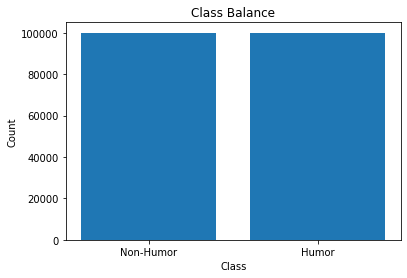

In [ ]:
un, count = np.unique(data.humor, return_counts=True)
plt.bar(["Humor" if i == 1 else "Non-Humor" for i in un], count)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance")
plt.show()

<b>Inference : </b> Well-balanced classes, hence no action required.

<h3>Word Cloud for humorous texts</h3>

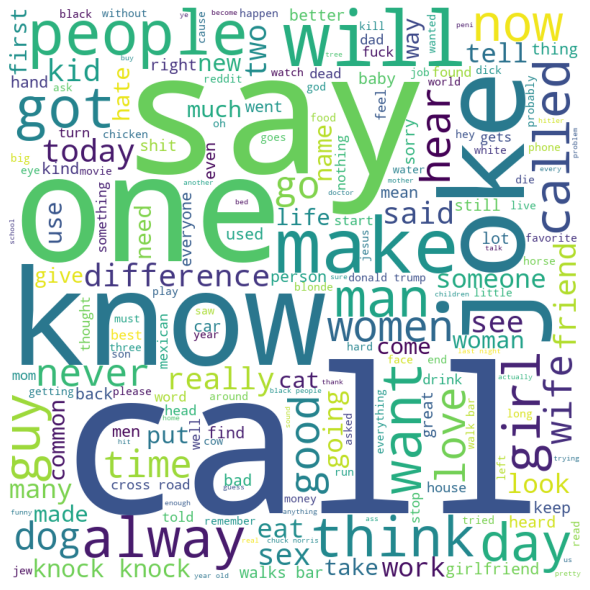

In [ ]:
string = ""
for i in data[data.humor == 1].text.values:
    string = string + " " + i.strip()
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(string)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
del string

<h3>Word cloud for Non-Humorous texts</h3>

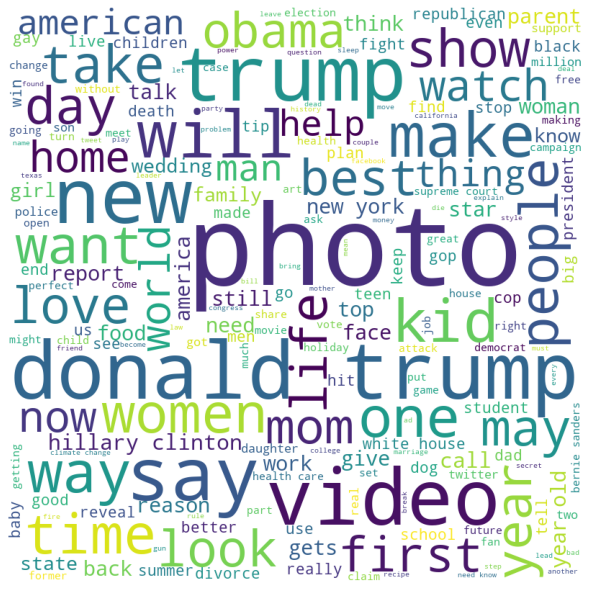

In [ ]:
string = ""
for i in data[data.humor == 0].text.values:
    string = string + " " + i.strip()
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(string)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()
del string

<h3>Sentiment distribution for Humorous and Non-Humorous texts</h3>

In [ ]:
sentiment = []
for text in data.text.values:
    polarity = TextBlob(text).sentiment.polarity
    if polarity < 0:
        sentiment.append("Negative")
    elif polarity == 0:
        sentiment.append("Neutral")
    else:
        sentiment.append("Positive")
data["sentiment"] = sentiment
del sentiment

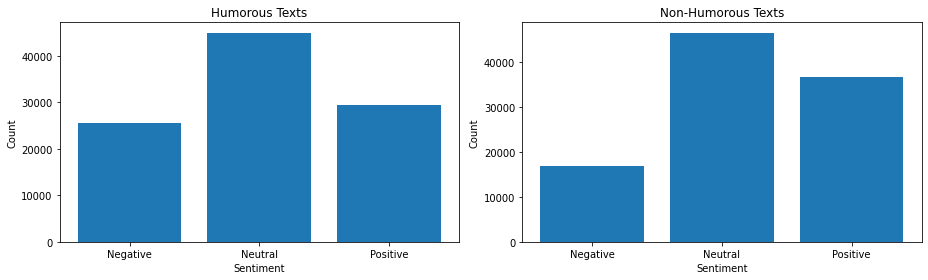

In [ ]:
plt.figure(figsize=(13,4))
plt.subplot(1,2,1)
un, count = np.unique(data[data.humor == 1].sentiment,return_counts=True)
plt.bar(un, count)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Humorous Texts")
plt.subplot(1,2,2)
un, count = np.unique(data[data.humor == 0].sentiment,return_counts=True)
plt.bar(un, count)
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.title("Non-Humorous Texts")
plt.tight_layout()

<b>Inference : </b><b>Humorous</b> texts have more <b>Negative</b> sentiment and less <b>Positive </b> sentiment in comparison with <b>Non-Humorous</b> texts mostly due to few jokes being offensive and containing adultery or swear words.

In [ ]:
del data['sentiment']

<h2>Modelling</h2>

<b>Data preparation</b>

In [ ]:
vec = TfidfVectorizer(max_features=3000)

X_train, X_test, Y_train, Y_test = train_test_split(vec.fit_transform(data.text.values).toarray(), 
                                                    data.humor.values.reshape(-1,1), 
                                                    test_size=0.2, 
                                                    shuffle=True, 
                                                    random_state=42)

<b>Model Training</b>

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
model = RandomForestClassifier(n_estimators=10,random_state=42)
model.fit(X_train, Y_train)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


RandomForestClassifier(n_estimators=10, random_state=42)

<b>Metrics</b>

In [ ]:
print("Train Accuracy  : {:.2f} %".format(accuracy_score(model.predict(X_train), Y_train)*100))
print("Test Accuracy   : {:.2f} %".format(accuracy_score(model.predict(X_test), Y_test)*100))
print("Precision       : {:.2f} %".format(precision_score(model.predict(X_test), Y_test)*100))
print("Recall          : {:.2f} %".format(recall_score(model.predict(X_test), Y_test)*100))

Train Accuracy  : 99.49 %
Test Accuracy   : 89.68 %
Precision       : 89.33 %
Recall          : 89.96 %


<b>Confusion Matrix</b>

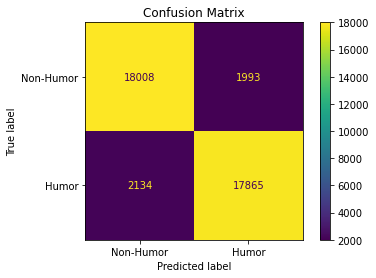

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(Y_test, model.predict(X_test))
disp = ConfusionMatrixDisplay(cm, display_labels=["Non-Humor","Humor"])
disp.plot()
plt.title("Confusion Matrix")
plt.show()

<b>Conclusion</b> : The model performs fairly well with 89% accuracy.

<h1 style="margin:auto;text-align:center;background-color:rgb(232, 230, 223);border-radius : 5px;padding-top : 25px;padding-bottom : 25px; width : 80%;font-size : 25px;">Thank you for reading! Upvote and share my notebook if you liked it</h1>